**Facebook Friend Connection network - for custom implementation**

In [ ]:
import networkx as nx
import community as c
import matplotlib.pyplot as plt
import sys
import pylab
import copy

pylab.show()

In [ ]:
def removeEdges(G): 
	remove = [] #stores edges having maximum betweenness which needs to be removed from graph
	b = nx.edge_betweenness_centrality(G)
	max_betweenness = b[max(b,key=b.get)]
	for k,v in b.items():
	    if v==max_betweenness:
	        remove.append(k)
	
	G.remove_edges_from(remove) # remove edges from G with max betwenness
	graphs = list(nx.connected_components(G))

	d={}
	counter = 0
	for graph in graphs:
		counter+=1
		for node in graph:
			d[node]=counter

	if G.number_of_edges() == 0:
		return [list(nx.connected_components(G)),0,G]

	modularity = c.modularity(d,G)
	return [list(nx.connected_components(G)),modularity,G]

In [ ]:
result_communities=[]
fh = open("input.txt", "rb")
G = nx.read_edgelist(fh)
fh.close()
copyGraph = copy.deepcopy(G)

In [ ]:
d={}
for node in G:
  d[node]=0	

In [ ]:
initial_modularity = c.modularity(d,G)
result_communities.append([d,initial_modularity,G])

In [ ]:
while G.number_of_edges()>0:
		subgraphs = removeEdges(G)
		result_communities.append(subgraphs)
		G=subgraphs[-1]

In [ ]:
for step in result_communities:
		if step[1]>initial_modularity:
			ng=step[0]
			result=[]
			modularity=step[1]
			
			for graph in step[0]:
				result.append(sorted([int(vertex) for vertex in graph]))

In [ ]:
for community in result:
		print(community)

[1, 2, 3]
[7]
[4, 5, 6]
[8]
[9, 10, 11]
[12, 13, 14]


In [ ]:
d={}
counter=0
	
for graph in ng:
	for node in graph:
		d[node] = counter 
	counter+=1

(-0.9720224241605745,
 0.9749338203781963,
 -1.191076267509067,
 1.2082018172746172)

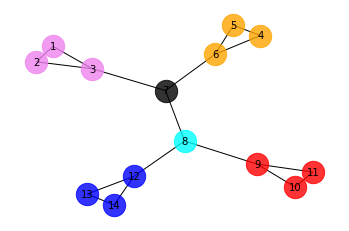

In [ ]:
pos=nx.spring_layout(copyGraph)
colors = ["violet","black","orange","cyan","red","blue","green","yellow","indigo","pink"]
for i in range(len(ng)):
	graph=ng[i]
	nlist = [node for node in graph]
	nx.draw_networkx_nodes(copyGraph,pos,nodelist=nlist,node_color=colors[i%10],node_size=500,alpha=0.8)

nx.draw_networkx_edges(copyGraph,pos)
nx.draw_networkx_labels(copyGraph,pos,font_size=10)
plt.axis('off')